In [1]:
import tensorflow as tf
import numpy as np
from modules.models import AdvectionPinn, create_dense_model
from modules.data import simulate_advection

2022-12-26 19:02:30.714936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
v = 20.0
k = 2.0
def f_u(x):
    r = v / k
    return (1 - tf.exp(r * x)) / (1 - tf.exp(r))

In [3]:
(x_eqn, y_eqn), (x_bnd, u_bnd) = simulate_advection(n_samples=1000)
u_exact = f_u(x_eqn)
inputs = [x_eqn, x_bnd]
outputs = [u_exact, y_eqn, u_bnd]

2022-12-26 18:53:09.185431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 18:53:09.234724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 18:53:09.235124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 18:53:09.236400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
backbone = create_dense_model([64]*9, tf.nn.elu, tf.keras.initializers.HeNormal(seed=10), 1, 1)
pinn = AdvectionPinn(backbone, v=v, k=k, loss_residual_weight=1.0, loss_boundary_weight=150.0)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=500, decay_rate=0.9)
pinn.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule))

In [5]:
history = pinn.fit(inputs, outputs, epochs=20000, batch_size=200, verbose=0)

In [6]:
from modules.plots import plot_training_loss_linlog

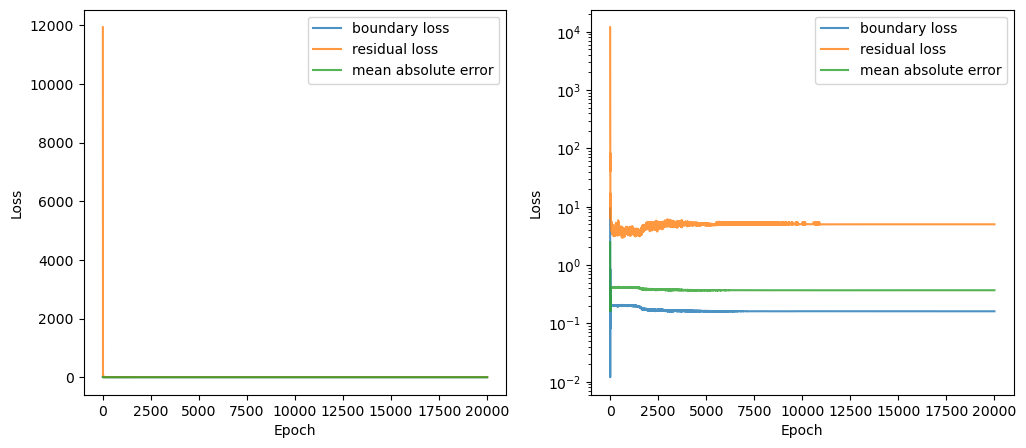

In [7]:
plot_training_loss_linlog(history.history)

In [9]:
from modules.plots import plot_advection_model

1/1 [==============================] - 0s 183ms/step


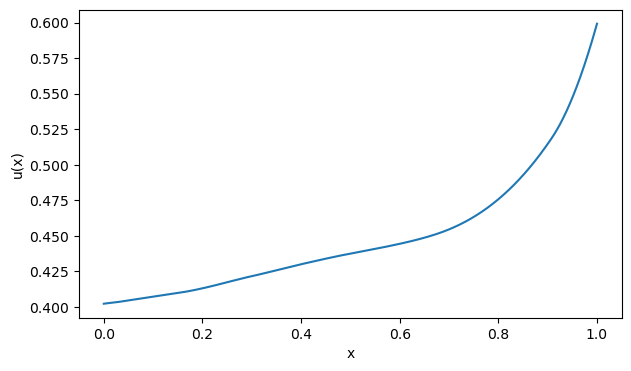

In [10]:
plot_advection_model(pinn.backbone)